In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.Gender.replace({'Female': 1, 'Male': 0}, inplace=True)

In [6]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [7]:
for column in df1:
    if df1[column].dtypes == 'bool':
        df1[column] = df1[column].astype(int)

In [19]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Data Visualization**

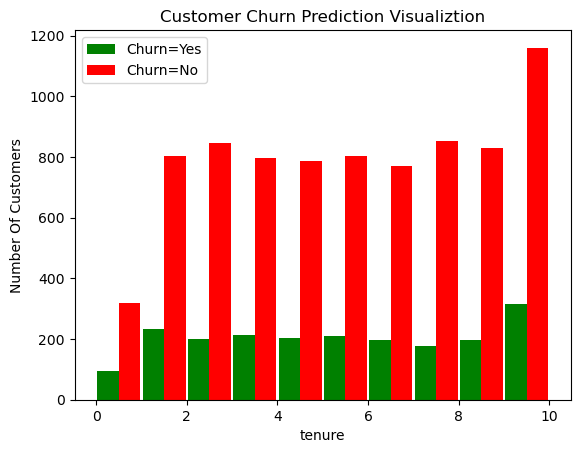

In [23]:
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

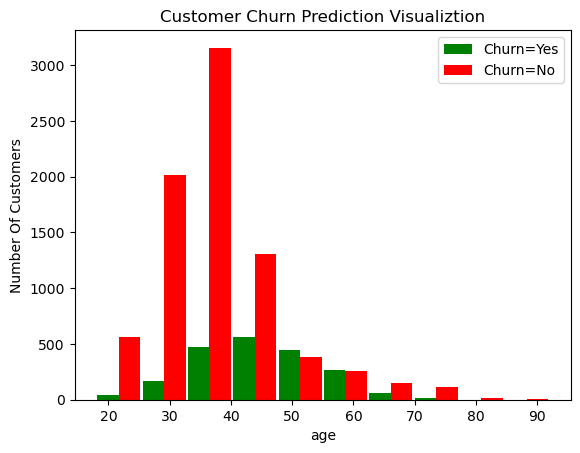

In [25]:
age_churn_no = df1[df1.Exited==0].Age
age_churn_yes = df1[df1.Exited==1].Age

plt.xlabel("age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([age_churn_yes, age_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [27]:
cols_to_scale = ['Tenure','Age','CreditScore', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

**Train test split**

In [32]:
X = df1.drop('Exited', axis=1)
y = df1.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [36]:
X_train.shape

(8000, 12)

In [38]:
X_test.shape

(2000, 12)

In [44]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4900 - accuracy: 0.7999
Epoch 2/100
250/250 [==============================] - 0s 940us/step - loss: 0.4656 - accuracy: 0.7999
Epoch 3/100
250/250 [==============================] - 0s 919us/step - loss: 0.4550 - accuracy: 0.8011
Epoch 4/100
250/250 [==============================] - 0s 988us/step - loss: 0.4462 - accuracy: 0.8060
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8096
Epoch 6/100
250/250 [==============================] - 0s 940us/step - loss: 0.4334 - accuracy: 0.8139
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8131
Epoch 8/100
250/250 [==============================] - 0s 956us/step - loss: 0.4266 - accuracy: 0.8174
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8167
Epoch 10/100
250/250 [==============================] - 0s 900us/step - loss: 0.4

In [46]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 984us/step - loss: 0.3508 - accuracy: 0.8615


[0.35083380341529846, 0.8615000247955322]

In [48]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 968us/step


In [50]:
yp[:5]

array([[0.17156045],
       [0.542577  ],
       [0.10032503],
       [0.23620203],
       [0.4026789 ]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
y_pred[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [60]:
y_test[:10]

8793    0
1122    1
1283    0
9318    0
7765    0
3011    0
7125    0
8823    0
3121    0
9314    1
Name: Exited, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1564
           1       0.85      0.44      0.58       436

    accuracy                           0.86      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.86      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

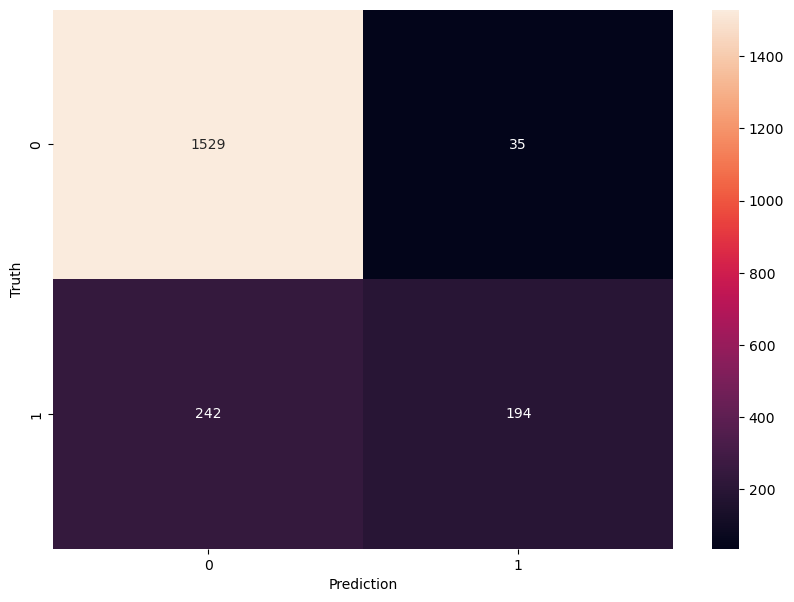

In [64]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')